# Optical Networking Gym: An Open-Source Toolkit for Resource Assignment Problems in Optical Networks

File processing the results of the experiments.

In [2]:
import itertools
import os
import pickle

import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# plt.rcParams.get("font.size")
plt.rcParams.update({'font.size': 14})

In [3]:
os.makedirs("results", exist_ok=True)
os.makedirs("figures", exist_ok=True)

topology_name = "nobel-eu"
# topology_name = "janos-us"
# topology_name = "germany50"
strategies = [1]#np.arange(1, 5)

launch_powers = np.linspace(-8, 8, 9)

if topology_name == "nobel-eu":
    load = 210.0
    loads = np.arange(50, 651, 50)
elif topology_name == "germany50":
    load = 400.0
    loads = np.arange(300, 801, 50)
elif topology_name == "janos-us":
    load = 150.0
    loads = np.arange(100, 601, 50)

bandwidth = 4e12
frequency_start = 3e8 / 1565e-9
frequency_end = frequency_start + bandwidth
frequency_slot_bandwidth = 12.5e9
bit_rates = np.array((10, 40, 100, 400), dtype=np.int16)

markers = ("o", ">", "s", "<", "^", "v")
heuristics = ["KSP-FF-BM", "LS-BM-KSP", "BM-KSP-LB", "KSP-LB-BM"]

## Plots for the topology

In [4]:
# with open(
#     os.path.join(
#         "..",
#         # "examples", 
#         "topologies", f"{topology_name}.xml"
#         # "examples", "topologies", "nobel-us_gn_5-paths_6-modulations.h5"
#         # "examples", "topologies", "nobel-eu_gn_5-paths_6-modulations.h5"
#         # "examples", "topologies", "janos-us_gn_5-paths_6-modulations.h5"
#         # "examples", "topologies", "nsfnet_chen_gn_5-paths_6-modulations.h5"
#     ), "rb"
# ) as f:
#     topology = pickle.load(f)
from typing import Tuple
from optical_networking_gym.topology import Modulation, get_topology

topology_path = os.path.join(
        "..",
        # "examples", 
        "topologies", f"{topology_name}_5-paths_6-modulations.h5"
        # "examples", "topologies", "nobel-us_gn_5-paths_6-modulations.h5"
        # "examples", "topologies", "nobel-eu_gn_5-paths_6-modulations.h5"
        # "examples", "topologies", "janos-us_gn_5-paths_6-modulations.h5"
        # "examples", "topologies", "nsfnet_chen_gn_5-paths_6-modulations.h5"
    ), "rb"
) as f:
    topology = pickle.load(f)

SyntaxError: unmatched ')' (3604790445.py, line 25)

In [ ]:
print("nodes:", topology.number_of_nodes(), topology.number_of_nodes()*(topology.number_of_nodes()-1) // 2)
print("edges:", topology.number_of_edges())

nodes: 28 378
edges: 41


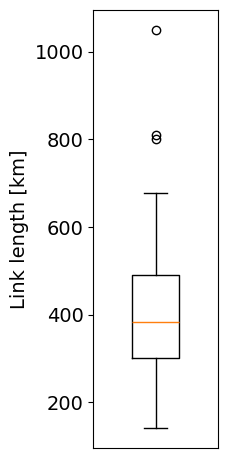

In [ ]:
plt.figure(figsize=(2.5, 4.8))
plt.boxplot([topology[x][y]["length"] for x, y in topology.edges()])
plt.ylabel("Link length [km]")
plt.xticks([], [])
plt.xlim([0.8, 1.2])
plt.tight_layout()
# plt.savefig(f"figures/{topology_name}_topo_link_length.png")
# plt.savefig(f"figures/{topology_name}_topo_link_length.pdf")
# plt.savefig(f"figures/{topology_name}_topo_link_length.svg")
plt.show()

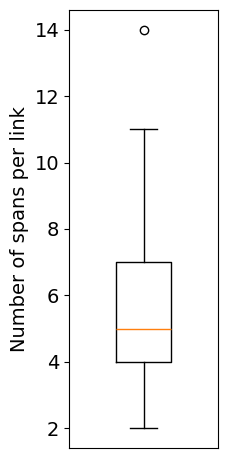

In [ ]:
plt.figure(figsize=(2.5, 4.8))
plt.boxplot([len(topology[x][y]["link"].spans) for x, y in topology.edges()])
plt.ylabel("Number of spans per link")
plt.xticks([], [])
plt.xlim([0.8, 1.2])
plt.tight_layout()
plt.savefig(f"figures/{topology_name}_topo_link_spans.png")
plt.savefig(f"figures/{topology_name}_topo_link_spans.pdf")
# plt.savefig(f"figures/{topology_name}_topo_link_spans.svg")
plt.show()

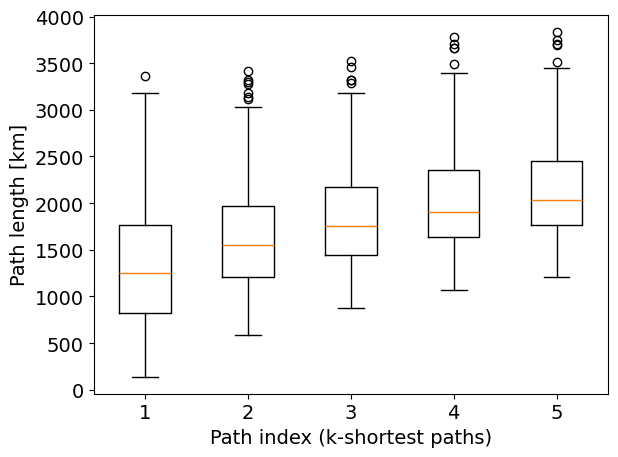

In [ ]:
path_lengths = []
for k in range(topology.graph["k_paths"]):
    path_lengths.append([topology.graph["ksp"][x, y][k].length for x, y in itertools.combinations(topology.nodes(), 2)])
plt.figure()
plt.boxplot(path_lengths)
plt.xlabel("Path index (k-shortest paths)")
plt.ylabel("Path length [km]")
plt.tight_layout()
# plt.savefig(f"figures/{topology_name}_topo_path_length.png")
# plt.savefig(f"figures/{topology_name}_topo_path_length.pdf")
# plt.savefig(f"figures/{topology_name}_topo_path_length.svg")
plt.show()

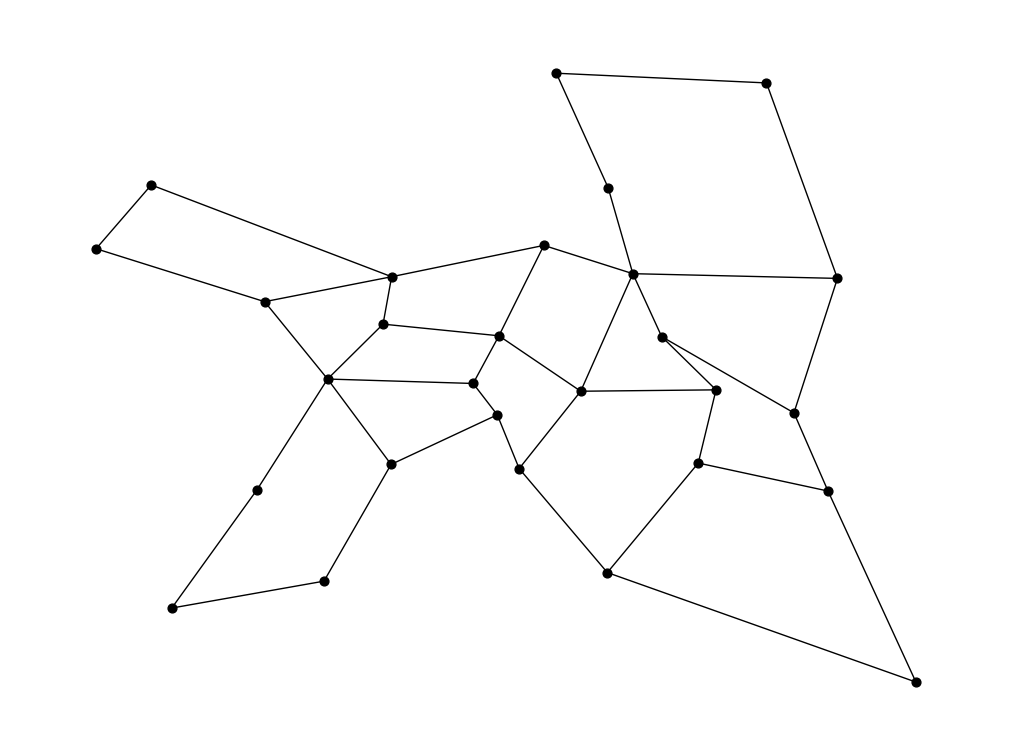

In [ ]:
pos = nx.get_node_attributes(topology, "pos")
labels = {x: f"{y:.0f}" for x, y in nx.get_edge_attributes(topology, "length").items()}
plt.figure(figsize=(12.8, 9.6))

nx.draw_networkx_nodes(topology, pos=pos, node_color="black", node_size=40)
# nx.draw_networkx_labels(topology, pos={x: (y[0], y[1]-0.5) for x, y in pos.items()}, labels={x: x for x in topology.nodes()}, font_color="blue")

nx.draw_networkx_edges(topology, pos=pos)
# nx.draw_networkx_edge_labels(topology, pos=pos, edge_labels=labels, font_size=12, rotate=False)
plt.axis('off')
plt.gca().set_aspect("equal", adjustable="box")
plt.savefig(f"figures/{topology_name}_topo.png")
plt.savefig(f"figures/{topology_name}_topo.pdf")
# plt.savefig(f"figures/{topology_name}_topo.svg")
plt.show()

## Plots for the launch power

In [32]:
data_episodes["episode_service_blocking_rate"].mean()

0.2902902902902903

Launch power: -8.0 dBm, mean: 0.1263, stdev: 0.0077
Launch power: -7.0 dBm, mean: 0.0906, stdev: 0.0098
Launch power: -6.0 dBm, mean: 0.0464, stdev: 0.0051
Launch power: -5.0 dBm, mean: 0.0258, stdev: 0.0065
Launch power: -4.0 dBm, mean: 0.0095, stdev: 0.0037
Launch power: -3.0 dBm, mean: 0.0036, stdev: 0.0024
Launch power: -2.0 dBm, mean: 0.0011, stdev: 0.0013
Launch power: -1.0 dBm, mean: 0.0009, stdev: 0.0008
Launch power: 0.0 dBm, mean: 0.0007, stdev: 0.0009
Launch power: 1.0 dBm, mean: 0.0005, stdev: 0.0007
Launch power: 2.0 dBm, mean: 0.0008, stdev: 0.0011
Launch power: 3.0 dBm, mean: 0.0011, stdev: 0.0012
Launch power: 4.0 dBm, mean: 0.0042, stdev: 0.0027
Launch power: 5.0 dBm, mean: 0.0414, stdev: 0.0072
Launch power: 6.0 dBm, mean: 0.1225, stdev: 0.0071
Launch power: 7.0 dBm, mean: 0.1838, stdev: 0.0111
Launch power: 8.0 dBm, mean: 0.2344, stdev: 0.0156


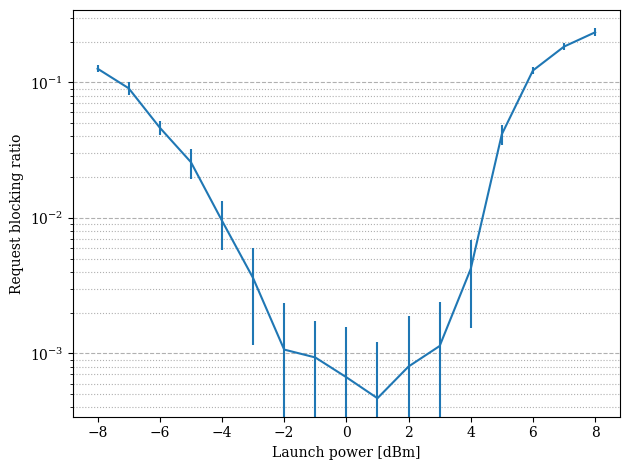

In [18]:
means = []
stdevs = []
topology_name = "nobel-eu"
load = 210.0
launch_powers = np.linspace(-8, 8, 17)
for launch_power in launch_powers:

    data_episodes = pd.read_csv(f"/home/talles/projects/optical-networking-gym/examples/jocn_benchmark_2024/results/simulation_updteded_th_results_{topology_name}_{launch_power}_200.0.csv", skiprows=1)
    means.append(data_episodes["episode_service_blocking_rate"].mean())
    stdevs.append(data_episodes["episode_service_blocking_rate"].std())
    print(f"Launch power: {launch_power:.1f} dBm, mean: {means[-1]:.4f}, stdev: {stdevs[-1]:.4f}")
plt.figure()
plt.errorbar(launch_powers, means, stdevs)
plt.gca().set_yscale("log")
plt.grid(visible=True, which="major", axis="y", ls="--")
# plt.grid(visible=True, which="major", axis="x", ls=":")
plt.grid(visible=True, which="minor", axis="y", ls=":")
plt.xlabel("Launch power [dBm]")
plt.ylabel("Request blocking ratio")
plt.xticks(range(-8, 9, 2))
plt.tight_layout()
# plt.savefig(f"figures/{topology_name}_lp_rbr.png")
# plt.savefig(f"figures/{topology_name}_lp_rbr.pdf")
# plt.savefig(f"figures/{topology_name}_lp_rbr.svg")
plt.show()

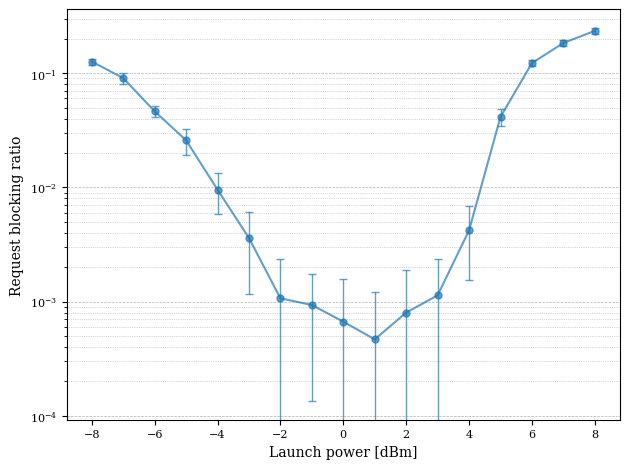

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# 1) Fonte serif e tamanho geral
plt.rc('font', family='serif', size=10)

# --- computa means e stdevs como antes ---
means, stdevs = [], []
topology_name = "nobel-eu"
launch_powers = np.linspace(-8, 8, 17)
for lp in launch_powers:
    df = pd.read_csv(
        f"/home/talles/projects/optical-networking-gym/examples/"
        f"jocn_benchmark_2024/results/"
        f"simulation_updteded_th_results_{topology_name}_{lp}_200.0.csv",
        skiprows=1
    )
    means.append(df["episode_service_blocking_rate"].mean())
    stdevs.append(df["episode_service_blocking_rate"].std())

# 2) Cria figura e eixo
fig, ax = plt.subplots()

# 3) Plota com barras de erro
ax.errorbar(
    launch_powers, means, yerr=stdevs,
    fmt='-o', capsize=3, markersize=5,
    elinewidth=1, alpha=0.7
)

# 4) Escala log no Y
ax.set_yscale('log')

# 5) Formatter científico integrado em cada tick:
fmt = mticker.LogFormatterSciNotation(base=10, labelOnlyBase=False)
# só usa científica para expoentes fora de [-2, 2]
fmt.powerlimits = (-2, 2)
ax.yaxis.set_major_formatter(fmt)

# 6) Remove o “×10⁻³” de offset
ax.yaxis.get_offset_text().set_visible(False)

# 7) Grid
ax.grid(which='major', axis='y', ls='--', linewidth=0.5)
ax.grid(which='minor', axis='y', ls=':', linewidth=0.5)

# 8) Rótulos e ticks
ax.set_xlabel("Launch power [dBm]", fontsize=10)
ax.set_ylabel("Request blocking ratio", fontsize=10)
ax.set_xticks(np.arange(-8, 9, 2))
ax.tick_params(axis='both', which='major', labelsize=8)

plt.tight_layout()

# 9) Salva em dpi reduzido
orig_dpi = fig.dpi
plt.savefig(f"figures/{topology_name}_lp_rbr.png", dpi=orig_dpi*3)

plt.show()



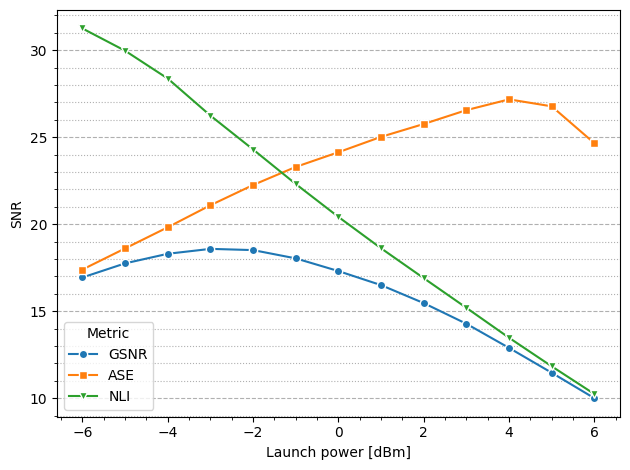

Melhor launch power: -3.0 dBm com média de OSNR = 18.58 dB


In [32]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# listas de estatísticas
mean_osnr = []
stdev_osnr = []
mean_ase = []
stdev_ase = []
mean_nli = []
stdev_nli = []
disrupted_services = []
best_launch_power = 1
best_mean = 1
load = 200.0

# diretório de saída completo
output_dir = "/home/talles/projects/optical-networking-gym/jocn_benchmark_2024/results/figures"
os.makedirs(output_dir, exist_ok=True)
launch_powers = np.linspace(-6, 6, 13)

for launch_power in launch_powers:
    path_services = (
        f"/home/talles/projects/optical-networking-gym/examples/"
        f"jocn_benchmark_2024/results/lp_services_1_"
        f"{topology_name}_{launch_power}_{load}_20.csv"
    )
    data_services = pd.read_csv(path_services, skiprows=1)

    # atualiza melhor launch power
    mean = data_services["osnr"].mean()
    if mean > best_mean:
        best_mean = mean
        best_launch_power = launch_power

    # estatísticas
    mean_osnr.append(mean)
    stdev_osnr.append(data_services["osnr"].std())
    mean_ase.append(data_services["ase"].mean())
    stdev_ase.append(data_services["ase"].std())
    mean_nli.append(data_services["nli"].mean())
    stdev_nli.append(data_services["nli"].std())
    path_episodes = (
        f"/home/talles/projects/optical-networking-gym/examples/"
        f"jocn_benchmark_2024/results/"
        f"simulation_updteded_th_results_{topology_name}_"
        f"{launch_power}_{load}.csv"
    )
    data_episodes = pd.read_csv(path_episodes, skiprows=1)
    disrupted_services.append(data_episodes["episode_disrupted_services"].sum())

# plot
plt.figure()
plt.plot(launch_powers, mean_osnr, label="GSNR", marker="o", mec="white")
plt.plot(launch_powers, mean_ase,  label="ASE",  marker="s", mec="white")
plt.plot(launch_powers, mean_nli, label="NLI",  marker="v", mec="white")

plt.minorticks_on()
plt.grid(which="major", axis="y", linestyle="--")
plt.grid(which="minor", axis="y", linestyle=":")
plt.xlabel("Launch power [dBm]")
plt.ylabel("SNR")
plt.legend(title="Metric")
plt.tight_layout()

# salva com caminho completo
filename_png = os.path.join(output_dir, f"{topology_name}_lp_snr.png")
filename_pdf = os.path.join(output_dir, f"{topology_name}_lp_snr.pdf")
filename_svg = os.path.join(output_dir, f"{topology_name}_lp_snr.svg")

plt.savefig(filename_png, dpi=300)
plt.savefig(filename_pdf)
plt.savefig(filename_svg)

plt.show()

print(f"Melhor launch power: {best_launch_power} dBm com média de OSNR = {best_mean:.2f} dB")


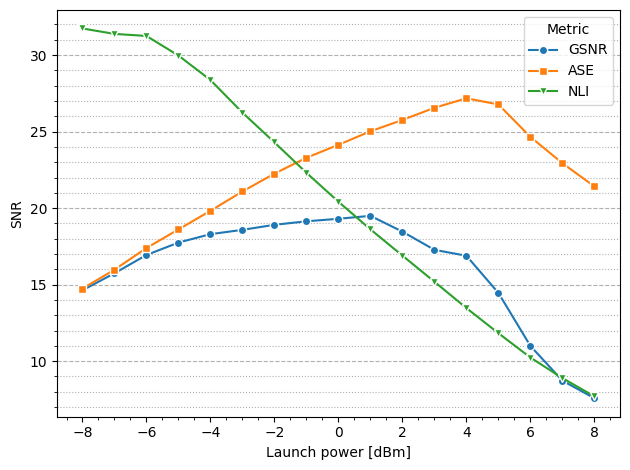

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import os
launch_powers = np.linspace(-8, 8, 17)
output_dir = "/home/talles/projects/optical-networking-gym/jocn_benchmark_2024/results/figures"
os.makedirs(output_dir, exist_ok=True)
topology_name = "nobel-eu"
plt.figure()
plt.plot(launch_powers, mean_osnr, label="GSNR", marker="o", mec="white")
plt.plot(launch_powers, mean_ase,  label="ASE",  marker="s", mec="white")
plt.plot(launch_powers, mean_nli, label="NLI",  marker="v", mec="white")

plt.minorticks_on()
plt.grid(which="major", axis="y", linestyle="--")
plt.grid(which="minor", axis="y", linestyle=":")
plt.xlabel("Launch power [dBm]")
plt.ylabel("SNR")
plt.legend(title="Metric")
plt.tight_layout()

# salva com caminho completo
filename_png = os.path.join(output_dir, f"{topology_name}_lp_snr.png")
filename_pdf = os.path.join(output_dir, f"{topology_name}_lp_snr.pdf")
filename_svg = os.path.join(output_dir, f"{topology_name}_lp_snr.svg")

plt.savefig(filename_png, dpi=300)
plt.savefig(filename_pdf)
plt.savefig(filename_svg)

plt.show()

#print(f"Melhor launch power: {best_launch_power} dBm com média de OSNR = {best_mean:.2f} dB")


### Launch power service statistics

In [5]:
data_services = pd.read_csv(f"results/lp_services_1_{topology_name}_{best_launch_power}_{load}_10.csv", skiprows=1)
data_services.describe()

NameError: name 'best_launch_power' is not defined

In [ ]:
data_services.head()

,id,source,destination,bit_rate,path_k,path_length,modulation,min_osnr,osnr,ase,nli,disrupted_services
0,1,7,4,100.0,5,727.668,3,18.6,21.609932,22.169626,30.785109,0
1,1,27,15,100.0,5,1337.704,2,12.6,17.839061,18.139674,29.586256,0
2,2,18,11,400.0,-1,-1.000,-1,-1.0,-1.000000,-1.000000,-1.000000,-1
3,3,12,23,400.0,5,582.287,2,12.6,15.931218,15.942289,41.872751,0
4,4,13,17,400.0,5,1132.273,2,12.6,13.264164,13.276096,38.880886,0


In [ ]:
accepted = data_services[(data_services["path_k"] != -1.0)]
accepted.describe()
# accepted["margin"] = accepted.apply(lambda x: x.osnr - x.min_osnr, axis=1)
# accepted = accepted.drop(["id", "source", "destination"], axis=1)
# accepted.describe()

NameError: name 'data_services' is not defined

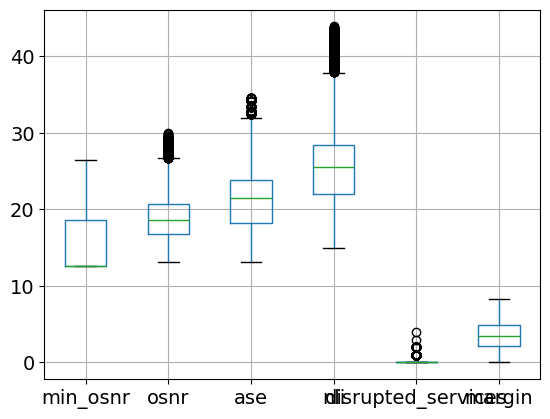

In [ ]:
accepted.drop(["path_k", "path_length", "bit_rate", "modulation"], axis=1).boxplot()
plt.show()

NameError: name 'accepted' is not defined

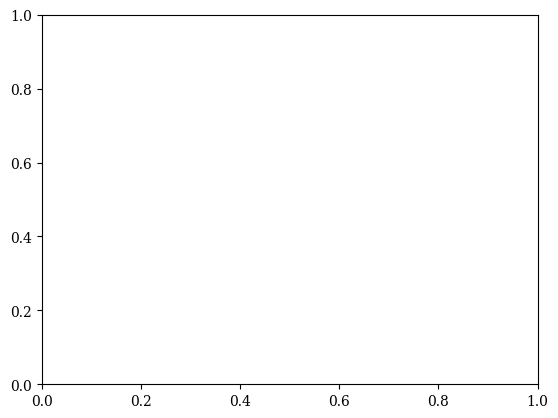

In [ ]:
plt.figure()

for modulation in sorted(accepted["modulation"].unique()):
    plt.scatter(accepted[(accepted["modulation"] == modulation)]["path_length"], accepted[(accepted["modulation"] == modulation)]["osnr"], label=modulation, zorder=modulation + 1, alpha=0.5, edgecolors=None)
plt.legend(loc=0, ncols=2, labels=("BPSK", "QPSK", "8QAM", "16QAM", "32QAM", "64QAM"))
plt.xlabel("Path length [m]")
plt.ylabel("GSNR [dB]")
plt.grid(which="major", axis="y", ls=":", zorder=0)
plt.tight_layout()
# plt.savefig(f"figures/{topology_name}_lp_gsnr_length.png")
# plt.savefig(f"figures/{topology_name}_lp_gsnr_length.pdf")
# plt.savefig(f"figures/{topology_name}_lp_gsnr_length.svg")
plt.show()

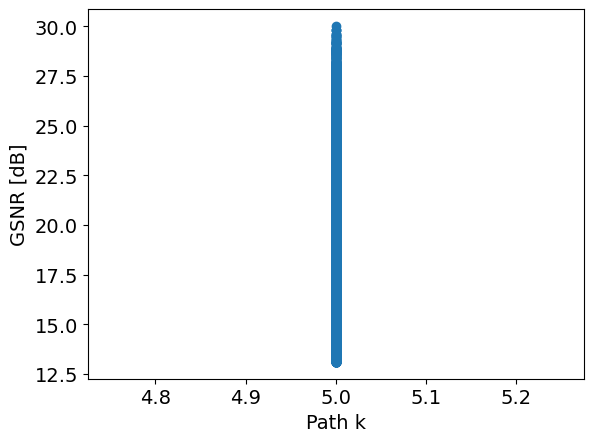

In [ ]:
plt.figure()
gsnr = []
for k in range(accepted["path_k"].max()+1):
    gsnr.append(accepted[(accepted["path_k"] == k)]["osnr"].to_numpy())
plt.scatter(accepted["path_k"], accepted["osnr"])
# plt.boxplot(gsnr)
plt.xlabel("Path k")
plt.ylabel("GSNR [dB]")
plt.savefig(f"figures/{topology_name}_lp_gsnr_k_path.png")
# plt.savefig(f"figures/{topology_name}_lp_gsnr_k_path.pdf")
# plt.savefig(f"figures/{topology_name}_lp_gsnr_k_path.svg")
plt.show()

### Launch power for a certain service

## Plots for impact of margin

In [ ]:
data_services = pd.read_csv(f"results/mr_services_1_0.0_{topology_name}_{best_launch_power}_{load}_10.csv", skiprows=1)
# data_services = pd.read_csv(f"results/mr_services_1_0.0_{topology_name.upper()}_-4.0_{load}_10.csv", skiprows=1)
# data_services.describe()
accepted = data_services[(data_services["path_k"] != -1)]
accepted["margin"] = accepted.apply(lambda x: x.osnr - x.min_osnr, axis=1)
# accepted = accepted.drop(["id", "source", "destination"], axis=1)
accepted.describe()

FileNotFoundError: [Errno 2] No such file or directory: 'results/mr_services_1_0.0_NOBEL-EU_-2.0_210.0_10.csv'

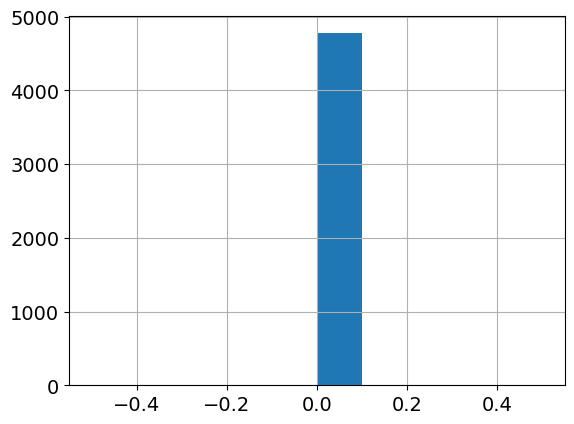

In [ ]:
accepted["disrupted_services"].hist()
plt.show()

In [ ]:
# data_episodes = pd.read_csv(f"results/mr_episodes_1_0.0_{topology_name.upper()}_{best_launch_power}_{load}.csv", skiprows=1)
data_episodes = pd.read_csv(f"results/mr_episodes_1_0.0_{topology_name.upper()}_-4.0_{load}.csv", skiprows=1)
data_episodes["episode_disrupted_services"]

0    0
1    0
2    0
3    0
4    0
Name: episode_disrupted_services, dtype: int64

## Plots about dataset generation

In [ ]:
with open(f"results/load_episodes_{1}_{topology_name}_{int(1.0)}_{load}.pkl", "rb") as file:
    dataset = pickle.load(file)

FileNotFoundError: [Errno 2] No such file or directory: 'results/load_episodes_1_nobel-eu_1_210.0.pkl'

## Plots loads

In [ ]:
data_loads = None
best_launch_power = 1.0
loads = np.arange(200, 1000, 100)
for strategy in strategies:
    for load in loads:
        if data_loads is None:
            data_loads = pd.read_csv(f"results/load_episodes_{strategy}_{topology_name}_{best_launch_power}_{load}.0.csv", skiprows=1)
            data_loads["strategy"] = strategy
            data_loads["load"] = load
        else:
            data_load = pd.read_csv(f"results/load_episodes_{strategy}_{topology_name}_{best_launch_power}_{load}.0.csv", skiprows=1)
            data_load["strategy"] = strategy
            data_load["load"] = load
            data_loads = pd.concat([data_loads, data_load], axis=0, ignore_index=True)
data_loads.head()

,episode,service_blocking_rate,episode_service_blocking_rate,bit_rate_blocking_rate,episode_bit_rate_blocking_rate,modulation_1,modulation_2,modulation_3,modulation_4,modulation_5,modulation_6,episode_disrupted_services,episode_time,strategy,load
0,0,0.001998,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,878.48,1,200
1,1,0.004498,0.006006,0.017230,0.017230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,909.02,1,200
2,2,0.003665,0.001001,0.002859,0.002859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,801.85,1,200
3,3,0.003749,0.003003,0.008688,0.008688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,589.16,1,200
4,4,0.003399,0.001001,0.003172,0.003172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,592.68,1,200


In [ ]:
data_loads[(data_loads["strategy"] == strategy)].groupby("load").mean()

,episode,service_blocking_rate,episode_service_blocking_rate,bit_rate_blocking_rate,episode_bit_rate_blocking_rate,modulation_1,modulation_2,modulation_3,modulation_4,modulation_5,modulation_6,episode_disrupted_services,episode_time,strategy
load,,,,,,,,,,,,,,
200,2.0,0.003462,0.002202,0.006390,0.006390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,754.238,1.0
300,2.0,0.016159,0.013814,0.038350,0.038350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,641.860,1.0
400,2.0,0.033509,0.037037,0.106063,0.106063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,596.692,1.0
500,2.0,0.052243,0.051852,0.141287,0.141287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,556.942,1.0
600,2.0,0.068546,0.064665,0.176804,0.176804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,531.790,1.0
700,2.0,0.072413,0.068268,0.174941,0.174941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,514.562,1.0
800,2.0,0.081380,0.084885,0.214709,0.214709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,504.790,1.0
900,2.0,0.104917,0.107307,0.232577,0.232577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,461.500,1.0


In [ ]:
plt.figure()
for ids, strategy in enumerate(strategies):
    # plt.errorbar(
    #     loads,
    #     data_loads[(data_loads["strategy"] == strategy)].groupby("load").mean()["episode_service_blocking_rate"],
    #     data_loads[(data_loads["strategy"] == strategy)].groupby("load").std()["episode_service_blocking_rate"],
    #     label=strategy, #marker="x"
    # )
    plt.plot(
        loads,
        data_loads[(data_loads["strategy"] == strategy)].groupby("load").mean()["episode_service_blocking_rate"],
        # data_loads[(data_loads["strategy"] == strategy)].groupby("load").std()["episode_service_blocking_rate"],
        label=strategy,
        marker=markers[ids],
        mec="white",
    )
    # print(strategy, data_loads[(data_loads["strategy"] == strategy)].groupby("load").mean()["episode_service_blocking_rate"])

plt.xlabel("Load [Erlang]")
plt.ylabel("Request blocking rate")
plt.gca().set_yscale("log")
plt.grid(visible=True, which="major", axis="y", ls="--")
plt.grid(visible=True, which="minor", axis="y", ls=":")
plt.legend(labels=heuristics)
plt.tight_layout()
plt.savefig(f"figures/{topology_name}_load_rbr.png")
plt.savefig(f"figures/{topology_name}_load_rbr.pdf")
# plt.savefig(f"figures/{topology_name}_load_rbr.svg")
plt.show()

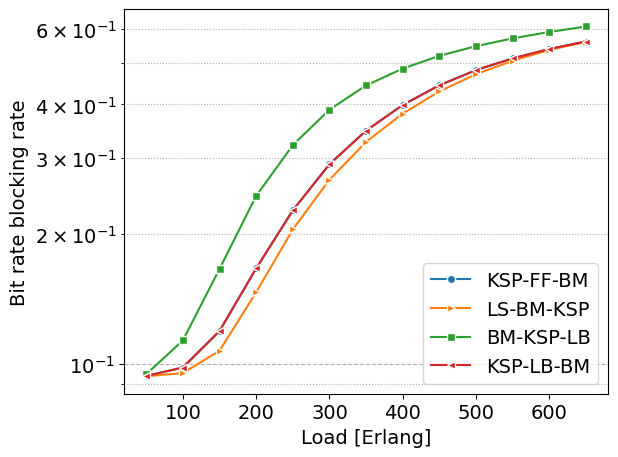

In [ ]:
plt.figure()
for ids, strategy in enumerate(strategies):
    plt.plot(
        # loads,
        data_loads[(data_loads["strategy"] == strategy)].groupby("load").mean()["episode_bit_rate_blocking_rate"],
        # data_loads[(data_loads["strategy"] == strategy)].groupby("load").std()["episode_bit_rate_blocking_rate"],
        label=strategy,
        marker=markers[ids],
        mec="white",
    )

plt.xlabel("Load [Erlang]")
plt.ylabel("Bit rate blocking rate")
plt.gca().set_yscale("log")
plt.grid(visible=True, which="major", axis="y", ls="--")
plt.grid(visible=True, which="minor", axis="y", ls=":")
plt.legend(labels=heuristics)
plt.tight_layout()
plt.savefig(f"figures/{topology_name}_load_brbr.png")
plt.savefig(f"figures/{topology_name}_load_brbr.pdf")
# plt.savefig(f"figures/{topology_name}_load_brbr.svg")
plt.show()

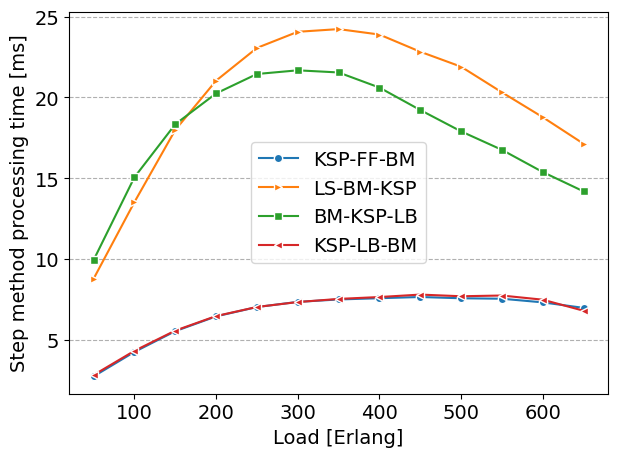

In [ ]:
plt.figure()
for ids, strategy in enumerate(strategies):
    # plt.errorbar(
    #     loads,
    #     data_loads[(data_loads["strategy"] == strategy)].groupby("load").mean()["episode_service_blocking_rate"],
    #     data_loads[(data_loads["strategy"] == strategy)].groupby("load").std()["episode_service_blocking_rate"],
    #     label=strategy, #marker="x"
    # )
    plt.plot(
        loads,
        data_loads[(data_loads["strategy"] == strategy)].groupby("load").mean()["episode_time"],
        # data_loads[(data_loads["strategy"] == strategy)].groupby("load").std()["episode_service_blocking_rate"],
        label=strategy,
        marker=markers[ids],
        mec="white",
    )
    # print(strategy, data_loads[(data_loads["strategy"] == strategy)].groupby("load").mean()["episode_service_blocking_rate"])

plt.xlabel("Load [Erlang]")
plt.ylabel("Step method processing time [ms]")
# plt.gca().set_yscale("log")
plt.grid(visible=True, which="major", axis="y", ls="--")
plt.grid(visible=True, which="minor", axis="y", ls=":")
plt.legend(labels=heuristics)
plt.tight_layout()
plt.savefig(f"figures/{topology_name}_load_step_time.png")
plt.savefig(f"figures/{topology_name}_load_step_time.pdf")
# plt.savefig(f"figures/{topology_name}_load_rbr.svg")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data_loads = None
best_launch_power = 1.0
loads = np.arange(50, 300, 50)
topology_name = "nobel-eu"
for strategy in [1,2]:
    for load in loads:
        for defragmentation in [[False,0], [True, 10], [True, 0]]:
            if data_loads is None:
                data_loads = pd.read_csv(f"results/load_episodes_{strategy}_def_{defragmentation[0]}_{defragmentation[1]}_{topology_name}_{best_launch_power}_{load}.0.csv", skiprows=1)
                print(f"results/load_episodes_{strategy}_def_{defragmentation[0]}_{defragmentation[1]}_{topology_name}_{best_launch_power}_{load}.0.csv")
                data_loads["strategy"] = strategy
                data_loads["load"] = load
                data_loads["defragmentation"] = defragmentation[0]
                data_loads["defragmentation_steps"] = defragmentation[1]
            else:
                data_load = pd.read_csv(f"results/load_episodes_{strategy}_def_{defragmentation[0]}_{defragmentation[1]}_{topology_name}_{best_launch_power}_{load}.0.csv", skiprows=1)
                data_load["strategy"] = strategy
                data_load["load"] = load
                data_load["defragmentation"] = defragmentation[0]
                data_load["defragmentation_steps"] = defragmentation[1]
                data_loads = pd.concat([data_loads, data_load], axis=0, ignore_index=True)

data_loads.head()

results/load_episodes_1_def_False_0_nobel-eu_1.0_50.0.csv


,episode,service_blocking_rate,episode_service_blocking_rate,bit_rate_blocking_rate,episode_bit_rate_blocking_rate,episode_service_realocations,episode_defrag_cicles,modulation_1,modulation_2,modulation_3,modulation_4,modulation_5,modulation_6,episode_disrupted_services,episode_time,mean_gsnr,strategy,load,defragmentation,defragmentation_steps
0,0,0.001998,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,958.36,18.473243,1,50,False,0
1,1,0.001499,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,951.51,18.461338,1,50,False,0
2,2,0.001333,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,932.89,18.399193,1,50,False,0
3,0,0.001998,0.0,0.0,0.0,736,109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1036.41,18.255225,1,50,True,10
4,1,0.001499,0.0,0.0,0.0,553,82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,979.31,18.393049,1,50,True,10


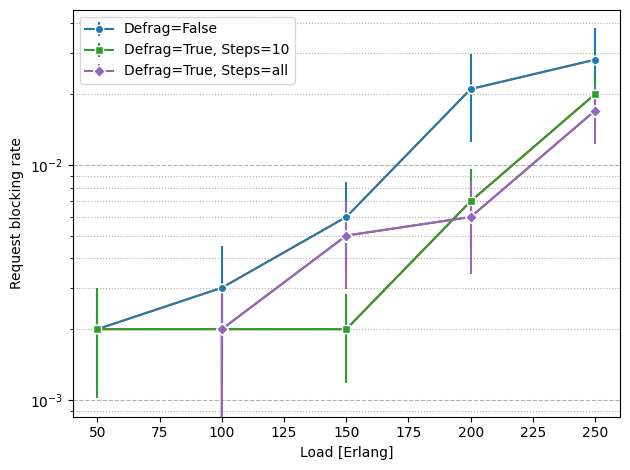

In [ ]:
plt.figure()

data_loads.loc[(data_loads["defragmentation"] == True) & (data_loads["defragmentation_steps"] == 0), "defragmentation_steps"] = "all"
data_loads.loc[(data_loads["defragmentation"] == False), "defragmentation_steps"] = ""

# Obter as combinações únicas de defragmentation e defragmentation_steps
unique_combinations = data_loads[['defragmentation', 'defragmentation_steps']].drop_duplicates().reset_index(drop=True)

# Defina uma lista de marcadores (ou use outro esquema de diferenciação, como cores ou estilos de linha)
markers = ['o', 's', 'D', 'x', '^', 'v']

# Iterar sobre cada combinação única
for idx, row in unique_combinations.iterrows():
    defrag = row['defragmentation']
    steps  = row['defragmentation_steps']
    
    # Filtrar os dados para a combinação atual
    df_filtered = data_loads[(data_loads['defragmentation'] == defrag) & (data_loads['defragmentation_steps'] == steps)]
    
    # Agrupar por 'load' e calcular a média e o desvio padrão
    grouped = df_filtered.groupby("load")["episode_service_blocking_rate"]
    mean_vals = grouped.max()
    std_vals = grouped.std()
    
    # Cria um label informativo para a combinação, sem exibir steps quando defrag == False
    if not defrag:
        label = f"Defrag={defrag}"
    else:
        label = f"Defrag={defrag}, Steps={steps}"
    
    # Plotar a linha com barras de erro
    plt.errorbar(
        mean_vals.index,
        mean_vals,
        yerr=std_vals,
        label=label,
        marker=markers[idx % len(markers)],
        linestyle='-',  # pode ajustar se preferir outro estilo
        mec="white"
    )
    
    # Opcional: também pode plotar a linha sem as barras de erro para reforçar o visual
    plt.plot(
        mean_vals.index,
        mean_vals,
        marker=markers[idx % len(markers)],
        linestyle='-',
        mec="white"
    )

plt.xlabel("Load [Erlang]")
plt.ylabel("Request blocking rate")
plt.gca().set_yscale("log")
plt.grid(visible=True, which="major", axis="y", ls="--")
plt.grid(visible=True, which="minor", axis="y", ls=":")
plt.legend()
plt.tight_layout()
# plt.savefig(f"figures/{topology_name}_load_rbr.png")
# plt.savefig(f"figures/{topology_name}_load_rbr.pdf")
plt.show()


/tmp/ipykernel_2544585/379243395.py:44: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  results = results.fillna(0).astype(int)


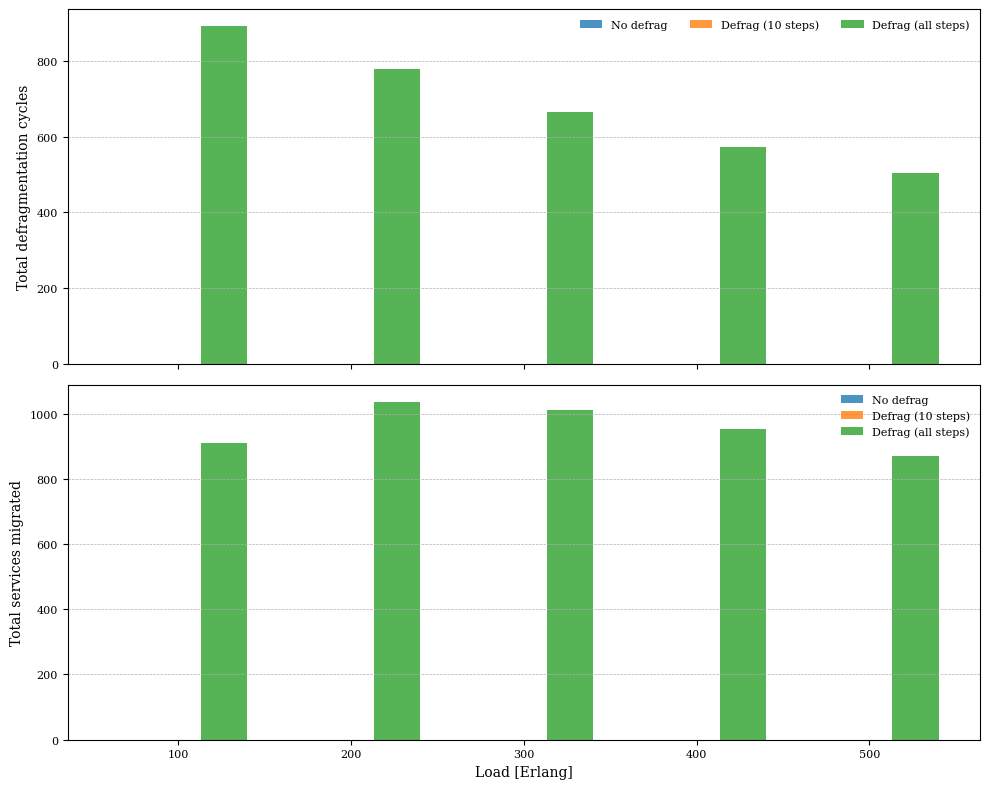

In [ ]:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt

    # --- 1) Prepara os steps conforme você já faz ---
    data_loads.loc[
        (data_loads["defragmentation"] == True) & (data_loads["defragmentation_steps"] == 0),
        "defragmentation_steps"
    ] = "all"
    data_loads.loc[
        (data_loads["defragmentation"] == False),
        "defragmentation_steps"
    ] = ""

    # --- 2) Definição das estratégias ---
    strategies = {
        "No defrag":          (data_loads["defragmentation"] == False),
        "Defrag=10 steps":    (data_loads["defragmentation"] == True) & (data_loads["defragmentation_steps"] == 10),
        "Defrag=all steps":   (data_loads["defragmentation"] == True) & (data_loads["defragmentation_steps"] == "all"),
    }

    # --- 3) Lista de cargas ---
    loads = sorted(data_loads["load"].unique())

    # --- 4) Monta DataFrame de resultados ---
    results = pd.DataFrame(index=loads, columns=pd.MultiIndex.from_product(
        [strategies.keys(), ["calls", "migrated"]]
    ))

    for strat_name, condition in strategies.items():
        df_strat = data_loads[condition]
        for load in loads:
            df_sub = df_strat[df_strat["load"] == load]
            # Se quiser contar quantos episódios executaram defrag:
            # calls = (df_sub["episode_defrag_cicles"] > 0).sum()
            # Se quiser somar o total de ciclos de defrag:
            calls = df_sub[' episode_defrag_cicles'].mean()
            migrated = df_sub[" episode_service_realocations"].mean()
            results.loc[load, (strat_name, "calls")] = calls
            results.loc[load, (strat_name, "migrated")] = migrated

    # Converte para numérico
    results = results.fillna(0).astype(int)

    # --- 5) Plot ---
    n_loads = len(loads)
    n_strat = len(strategies)
    bar_width = 0.8 / n_strat  # distribuir dentro de 0.8 do tick

    x = np.arange(n_loads)
    fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

    for i, metric in enumerate(["calls", "migrated"]):
        ax = axes[i]
        for j, strat_name in enumerate(strategies.keys()):
            vals = results[(strat_name, metric)].values
            offset = (j - (n_strat-1)/2) * bar_width
            ax.bar(
                x + offset,
                vals,
                width=bar_width,
                label=strat_name,
                capsize=3
            )
        ax.set_ylabel("Total " + ("defrag cycles" if metric=="calls" else "services migrated"))
        ax.grid(visible=True, which="major", axis="y", ls="--")
        ax.legend(ncol=3 if i==0 else 1, fontsize='small')

    axes[-1].set_xticks(x)
    axes[-1].set_xticklabels(loads)
    axes[-1].set_xlabel("Load [Erlang]")
    plt.tight_layout()
    plt.show()



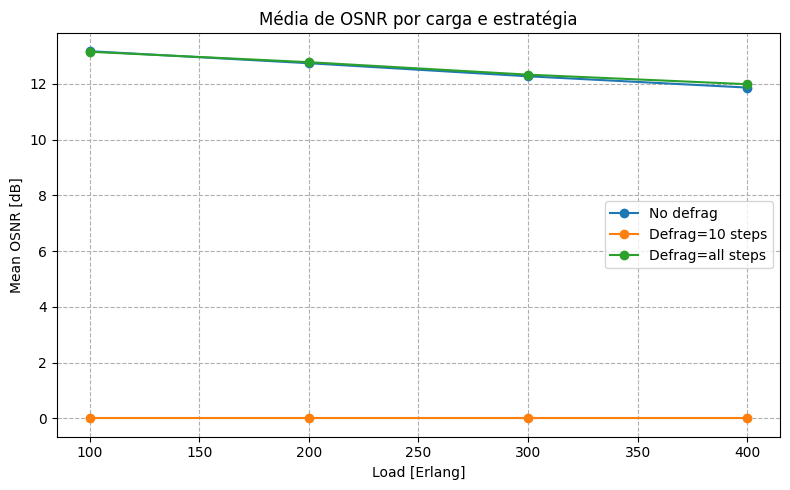

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- 1) Prepara os steps conforme antes ---
data_loads.loc[
    (data_loads["defragmentation"] == True) & (data_loads["defragmentation_steps"] == 0),
    "defragmentation_steps"
] = "all"
data_loads.loc[
    (data_loads["defragmentation"] == False),
    "defragmentation_steps"
] = ""

# --- 2) Definição das estratégias ---
strategies = {
    "No defrag":          (data_loads["defragmentation"] == False),
    "Defrag=10 steps":    (data_loads["defragmentation"] == True) & (data_loads["defragmentation_steps"] == 10),
    "Defrag=all steps":   (data_loads["defragmentation"] == True) & (data_loads["defragmentation_steps"] == "all"),
}

# --- 3) Lista de cargas ---
loads = sorted(data_loads["load"].unique())

# --- 4) Calcula média de OSNR por carga e estratégia ---
osnr_means = pd.DataFrame(index=loads, columns=strategies.keys(), dtype=float)

for strat_name, condition in strategies.items():
    df_strat = data_loads[condition]
    # agrupa por load e calcula média de mean_gsnr
    grp = df_strat.groupby("load")["mean_gsnr"].mean()
    # reindex para garantir todas as cargas
    osnr_means[strat_name] = grp.reindex(loads, fill_value=0)

# --- 5) Plot de linhas ---
fig, ax = plt.subplots(figsize=(8, 5))

for strat_name in strategies.keys():
    ax.plot(
        loads,
        osnr_means[strat_name],
        marker='o',
        linestyle='-',
        label=strat_name
    )

ax.set_xlabel("Load [Erlang]")
ax.set_ylabel("Mean OSNR [dB]")
ax.set_title("Média de OSNR por carga e estratégia")
ax.grid(visible=True, which="major", axis="both", ls="--")
ax.legend()
plt.tight_layout()
plt.show()


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data_loads = None
best_launch_power = 1.0
loads = np.arange(100, 401, 100)
topology_name = "nobel-eu"
for strategy in [1, 2, 3]:
    a = {1:"nli", 2:"ase", 3:"dist"}
    st = a[strategy]
    for load in loads:
        for defragmentation in [[False,0], [True, 0]]:
            if data_loads is None:
                data_loads = pd.read_csv(fr"/home/talles/projects/optical-networking-gym/examples/jocn_benchmark_2024/results/load_episodes_1_{st}_def_{defragmentation[0]}_{defragmentation[1]}_{topology_name}_{best_launch_power}_{load}.0_nw_cnr_nobel-eu.csv", skiprows=1)
                data_loads["strategy"] = strategy
                data_loads["load"] = load
                data_loads["defragmentation"] = defragmentation[0]
                data_loads["defragmentation_steps"] = defragmentation[1]
            else:
                data_load = pd.read_csv(fr"/home/talles/projects/optical-networking-gym/examples/jocn_benchmark_2024/results/load_episodes_1_{st}_def_{defragmentation[0]}_{defragmentation[1]}_{topology_name}_{best_launch_power}_{load}.0_nw_cnr_nobel-eu.csv", skiprows=1)
                data_load["strategy"] = strategy
                data_load["load"] = load
                data_load["defragmentation"] = defragmentation[0]
                data_load["defragmentation_steps"] = defragmentation[1]
                data_loads = pd.concat([data_loads, data_load], axis=0, ignore_index=True)

data_loads.head()

,episode,service_blocking_rate,episode_service_blocking_rate,bit_rate_blocking_rate,episode_bit_rate_blocking_rate,episode_service_realocations,episode_defrag_cicles,modulation_1,modulation_2,modulation_3,modulation_4,modulation_5,modulation_6,episode_disrupted_services,episode_time,mean_gsnr,strategy,load,defragmentation,defragmentation_steps
0,0,0.012987,0.011011,0.034461,0.034461,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.73,16.061912,1,100,False,0
1,1,0.013993,0.014014,0.044038,0.044038,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.87,15.963785,1,100,False,0
2,2,0.013995,0.013013,0.041016,0.041016,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.67,16.075290,1,100,False,0
3,3,0.013247,0.010010,0.032533,0.032533,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.62,16.281968,1,100,False,0
4,4,0.011798,0.005005,0.016964,0.016964,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.81,16.161800,1,100,False,0


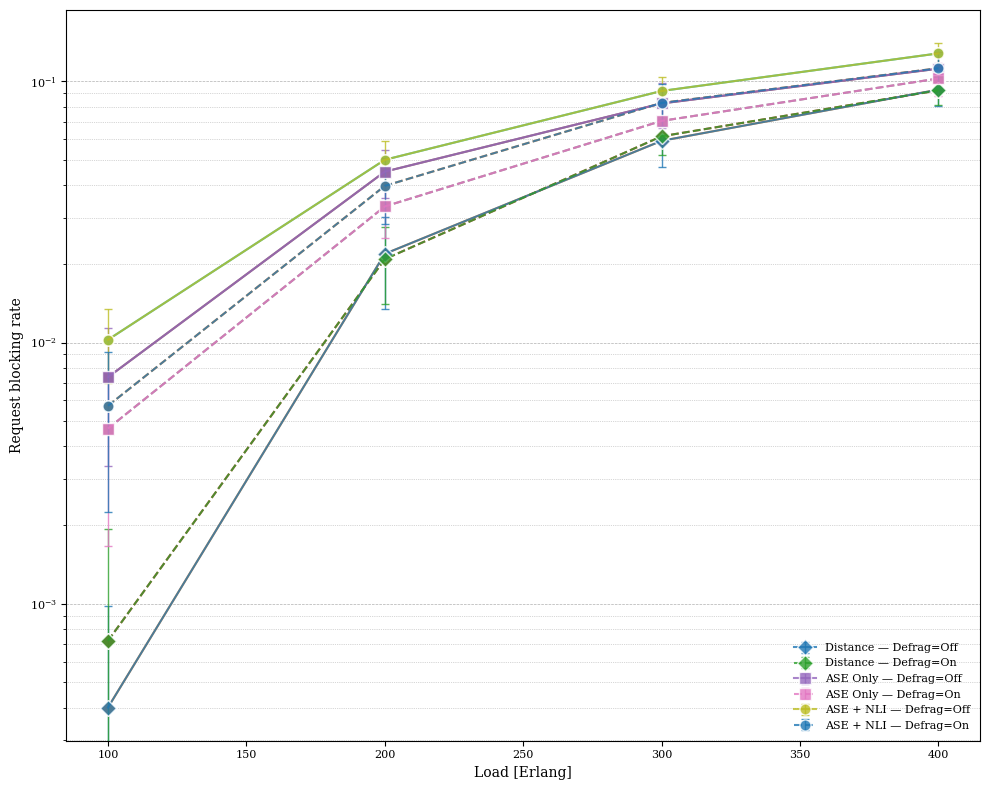

In [15]:
import matplotlib.pyplot as plt

# 0) Fonte serif e tamanho geral
plt.rc('font', family='serif', size=10)

# 1) Mapeie os códigos de estratégia para nomes legíveis em inglês
strategy_map = {
    1: "ASE + NLI",
    2: "ASE Only",
    3: "Distance"
}
data_loads["strategy_name"] = data_loads["strategy"].map(strategy_map)

# 2) Normalize defragmentation_steps
data_loads.loc[
    (data_loads["defragmentation"] == True) & (data_loads["defragmentation_steps"] == 0),
    "defragmentation_steps"
] = "all"
data_loads.loc[
    data_loads["defragmentation"] == False,
    "defragmentation_steps"
] = "0"

# 3) Defina um marcador fixo para cada estratégia
marker_map = {
    "ASE + NLI":    "o",
    "ASE Only":     "s",
    "Distance": "D"
}
marker_size = 8

# 4) Ordem desejada de plotagem
strategy_order = ["Distance", "ASE Only", "ASE + NLI"]

# 5) Crie figura e eixo
fig, ax = plt.subplots(figsize=(10, 8))

# 6) Loop seguindo a ordem
for strat in strategy_order:
    for defrag in [False, True]:
        df_f = data_loads[
            (data_loads["strategy_name"] == strat) &
            (data_loads["defragmentation"] == defrag)
        ]
        if df_f.empty:
            continue

        grouped   = df_f.groupby("load")["episode_service_blocking_rate"]
        mean_vals = grouped.mean()
        std_vals  = grouped.std()

        marker    = marker_map[strat]
        linestyle = '--' if defrag else '-'
        state     = 'On' if defrag else 'Off'
        label     = f"{strat} — Defrag={state}"

        # barras de erro
        ax.errorbar(
            mean_vals.index,
            mean_vals,
            yerr=std_vals,
            label=label,
            marker=marker,
            markersize=marker_size,
            linestyle=linestyle,
            mec="white",
            capsize=3,
            elinewidth=1,
            alpha=0.8
        )
        # reforço da linha
        ax.plot(
            mean_vals.index,
            mean_vals,
            marker=marker,
            markersize=marker_size,
            linestyle=linestyle,
            mec="white",
            alpha=0.9
        )

# 7) Ajustes de estilo
ax.set_xlabel("Load [Erlang]", fontsize=10)
ax.set_ylabel("Request blocking rate", fontsize=10)
ax.set_yscale("log")

ax.grid(True, which="major", axis="y", ls="--", linewidth=0.5)
ax.grid(True, which="minor", axis="y", ls=":", linewidth=0.5)

ax.tick_params(axis='both', which='major', labelsize=8)

ax.legend(loc='lower right', fontsize=8, frameon=False)

plt.tight_layout()
plt.show()


In [ ]:
data_loads = data_loads[data_loads["load"] != 500]

In [18]:
# 1) Calcular a média de blocking rate por estratégia, carga e defrag
mean_rates = (
    data_loads
    .groupby(["strategy_name", "load", "defragmentation"])["episode_service_blocking_rate"]
    .mean()
    .unstack(level="defragmentation")  # cria colunas False e True
    .rename(columns={False: "off", True: "on"})
    .fillna(0)  # caso alguma combinação esteja faltando
)

# 2) Calcular diferença absoluta e relativa (%)
mean_rates["diff_abs"] = mean_rates["on"] - mean_rates["off"]
mean_rates["diff_pct"] = (mean_rates["diff_abs"] / mean_rates["off"]) * 100

# 3) Imprimir
for (strategy, load), row in mean_rates.iterrows():
    print(
        f"{strategy:8s} | Load {load:6.1f} Erlang | "
        f"On–Off = {row['diff_abs']:.4f} "
        f"(Δ% = {row['diff_pct']:.1f}%)"
    )


ASE + NLI | Load  100.0 Erlang | On–Off = -0.0045 (Δ% = -44.1%)
ASE + NLI | Load  200.0 Erlang | On–Off = -0.0103 (Δ% = -20.5%)
ASE + NLI | Load  300.0 Erlang | On–Off = -0.0092 (Δ% = -10.0%)
ASE + NLI | Load  400.0 Erlang | On–Off = -0.0157 (Δ% = -12.3%)
ASE Only | Load  100.0 Erlang | On–Off = -0.0027 (Δ% = -36.4%)
ASE Only | Load  200.0 Erlang | On–Off = -0.0119 (Δ% = -26.4%)
ASE Only | Load  300.0 Erlang | On–Off = -0.0117 (Δ% = -14.3%)
ASE Only | Load  400.0 Erlang | On–Off = -0.0093 (Δ% = -8.3%)
Distance | Load  100.0 Erlang | On–Off = 0.0003 (Δ% = 80.0%)
Distance | Load  200.0 Erlang | On–Off = -0.0010 (Δ% = -4.6%)
Distance | Load  300.0 Erlang | On–Off = 0.0024 (Δ% = 4.1%)
Distance | Load  400.0 Erlang | On–Off = -0.0006 (Δ% = -0.6%)


In [17]:
# Garante que os nomes estejam corretos antes da média
strategy_map = {
    1: "ASE + NLI",
    2: "ASE Only",
    3: "Distance"
}
data_loads["strategy_name"] = data_loads["strategy"].map(strategy_map)

# 1) Calcule a média de blocking rate por strategy, load e defragmentation
mean_rates = (
    data_loads
    .groupby(["strategy_name", "load", "defragmentation"])["episode_service_blocking_rate"]
    .mean()
    .reset_index()
)

# 2) Extraia o baseline ASE + NLI
baseline = mean_rates[mean_rates["strategy_name"] == "ASE + NLI"] \
    .set_index(["load", "defragmentation"])["episode_service_blocking_rate"]

# 3) Faça merge para incluir baseline em todas as linhas
merged = mean_rates.merge(
    baseline.rename("baseline_rate"),
    how="left",
    left_on=["load", "defragmentation"],
    right_index=True
)

# 4) Calcule o erro absoluto e percentual em relação ao baseline
merged["error_abs"] = merged["episode_service_blocking_rate"] - merged["baseline_rate"]
merged["error_pct"] = (merged["error_abs"] / merged["baseline_rate"]) * 100

# 5) Filtre para não incluir o baseline nos resultados
to_print = merged[merged["strategy_name"] != "ASE + NLI"]

# 6) Imprima formatado com melhor clareza
for _, row in to_print.iterrows():
    strat = row["strategy_name"]
    load = row["load"]
    defrag = "On" if row["defragmentation"] else "Off"
    err_abs = row["error_abs"]
    err_pct = row["error_pct"]
    print(
        f"{strat:10s} | Load {load:6.1f} | Defrag={defrag:3s} | "
        f"Erro abs = {err_abs:+.4f} | Erro % = {err_pct:+6.2f}%"
    )



ASE Only   | Load  100.0 | Defrag=Off | Erro abs = -0.0029 | Erro % = -28.12%
ASE Only   | Load  100.0 | Defrag=On  | Erro abs = -0.0010 | Erro % = -18.18%
ASE Only   | Load  200.0 | Defrag=Off | Erro abs = -0.0050 | Erro % =  -9.91%
ASE Only   | Load  200.0 | Defrag=On  | Erro abs = -0.0066 | Erro % = -16.60%
ASE Only   | Load  300.0 | Defrag=Off | Erro abs = -0.0096 | Erro % = -10.41%
ASE Only   | Load  300.0 | Defrag=On  | Erro abs = -0.0121 | Erro % = -14.67%
ASE Only   | Load  400.0 | Defrag=Off | Erro abs = -0.0161 | Erro % = -12.61%
ASE Only   | Load  400.0 | Defrag=On  | Erro abs = -0.0097 | Erro % =  -8.66%
Distance   | Load  100.0 | Defrag=Off | Erro abs = -0.0098 | Erro % = -96.09%
Distance   | Load  100.0 | Defrag=On  | Erro abs = -0.0050 | Erro % = -87.41%
Distance   | Load  200.0 | Defrag=Off | Erro abs = -0.0282 | Erro % = -56.35%
Distance   | Load  200.0 | Defrag=On  | Erro abs = -0.0189 | Erro % = -47.59%
Distance   | Load  300.0 | Defrag=Off | Erro abs = -0.0327 | Err

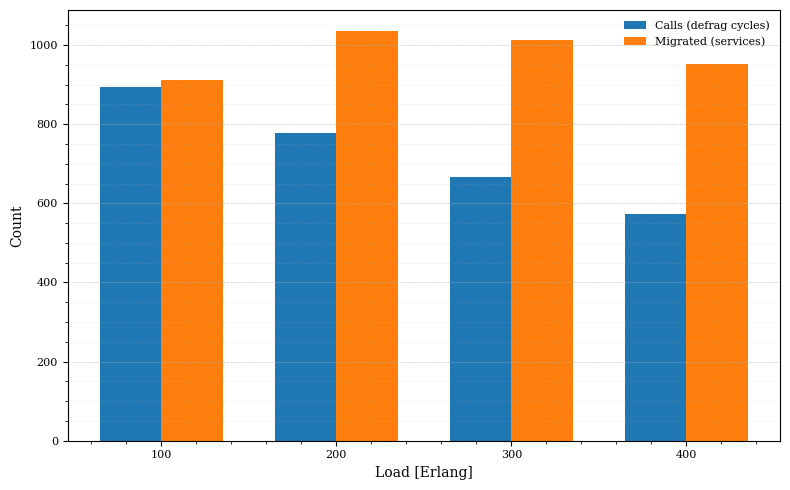

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 0) Fonte serif e tamanho geral
plt.rc('font', family='serif', size=10)

# 1) Filtra apenas o cenário Defrag=all steps
df_defrag = data_loads[
    (data_loads["defragmentation"] == True) & 
    (data_loads["defragmentation_steps"] == "all")
]

# 2) Lista de cargas
loads = sorted(df_defrag["load"].unique())

# 3) Calcula média de calls e migrated por carga
calls    = df_defrag.groupby("load")[" episode_defrag_cicles"].mean()
migrated = df_defrag.groupby("load")[" episode_service_realocations"].mean()

# 4) Prepara o gráfico
x = np.arange(len(loads))
width = 0.35  # largura das barras

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, calls.loc[loads],    width, label="Calls (defrag cycles)")
bars2 = ax.bar(x + width/2, migrated.loc[loads], width, label="Migrated (services)")

# 5) Legend, labels e grid com tamanhos consistentes
ax.set_xlabel("Load [Erlang]", fontsize=10)
ax.set_ylabel("Count", fontsize=10)

ax.set_xticks(x)
ax.set_xticklabels(loads, fontsize=8)
ax.tick_params(axis='y', labelsize=8)

ax.legend(fontsize=8, frameon=False)

ax.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.7)
ax.minorticks_on()
ax.grid(axis="y", which="minor", linestyle=":", linewidth=0.5, alpha=0.4)

plt.tight_layout()
plt.show()


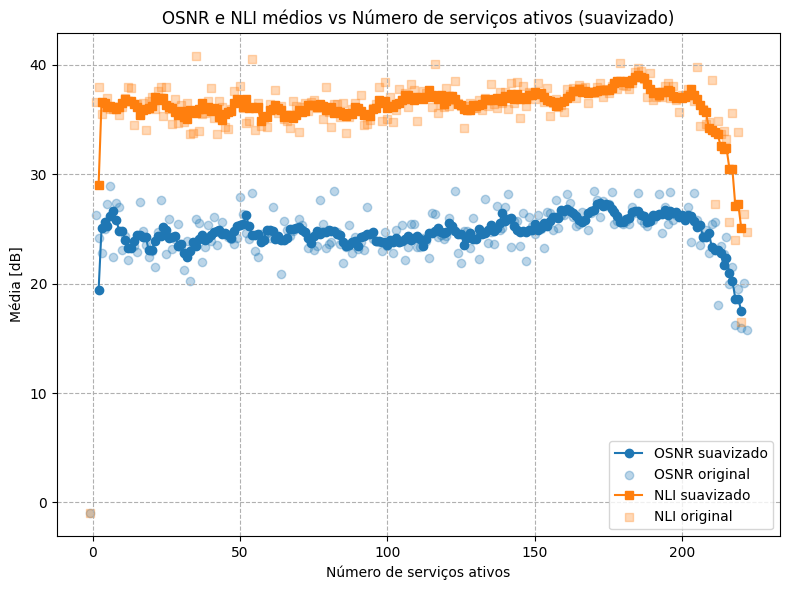

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Leitura e agregação por média de OSNR e NLI
df = pd.read_csv(
    '/home/talles/projects/optical-networking-gym/examples/jocn_benchmark_2024/results/'
    'load_services_ase_tst_1_def_False_0_nobel-eu_1.0_200.0_50.csv',
    skiprows=1
)
df_group = (
    df
    .groupby('active_services')
    .agg(
        mean_osnr=('osnr', 'max'),
        mean_nli=('nli', 'max')
    )
    .reset_index()
    .sort_values('active_services')
)

# 2) Suavização com média móvel centrada
window = 5
df_group['osnr_smooth'] = df_group['mean_osnr'].rolling(window, center=True).mean()
df_group['nli_smooth']  = df_group['mean_nli'].rolling(window, center=True).mean()

# 3) Plotagem
plt.figure(figsize=(8, 6))

# OSNR
plt.plot(
    df_group['active_services'], df_group['osnr_smooth'],
    marker='o', linestyle='-',
    label='OSNR suavizado'
)
plt.scatter(
    df_group['active_services'], df_group['mean_osnr'],
    alpha=0.3, marker='o', label='OSNR original'
)

# NLI
plt.plot(
    df_group['active_services'], df_group['nli_smooth'],
    marker='s', linestyle='-',
    label='NLI suavizado'
)
plt.scatter(
    df_group['active_services'], df_group['mean_nli'],
    alpha=0.3, marker='s', label='NLI original'
)

plt.xlabel('Número de serviços ativos')
plt.ylabel('Média [dB]')
plt.title('OSNR e NLI médios vs Número de serviços ativos (suavizado)')
plt.legend()
plt.grid(True, ls="--")
plt.tight_layout()
plt.show()



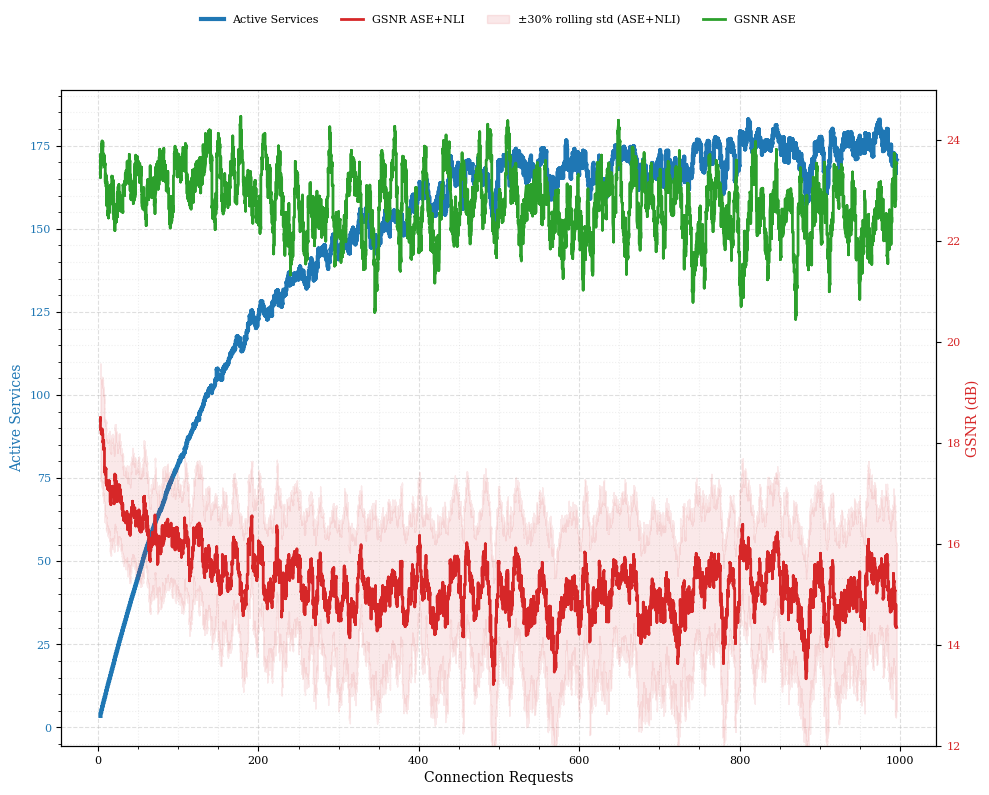

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 0) Fonte serif e tamanho geral
plt.rc('font', family='serif', size=10)

# Paths to CSV files
path_ase_nli = '/home/talles/projects/optical-networking-gym/examples/jocn_benchmark_2024/results/load_services_ase+nli_tst_1_def_False_0_nobel-eu_1.0_200.0_50.csv'
path_ase     = '/home/talles/projects/optical-networking-gym/examples/jocn_benchmark_2024/results/load_services_ase_tst_1_def_False_0_nobel-eu_1.0_200.0_50.csv'

# Read & sort
df_nli = pd.read_csv(path_ase_nli, skiprows=1).sort_values('id').reset_index(drop=True)
df_ase = pd.read_csv(path_ase,     skiprows=1).sort_values('id').reset_index(drop=True)

# Rolling mean/std
window = 150
df_nli['OSNR_smooth']     = df_nli['osnr'].rolling(window, center=True).mean()
df_nli['OSNR_std']        = df_nli['osnr'].rolling(window, center=True).std()
df_nli['Services_smooth'] = df_nli['active_services'].rolling(window, center=True).mean()
df_ase['OSNR_smooth']     = df_ase['osnr'].rolling(window, center=True).mean()

# Ribbon ±30% std for ASE+NLI
scale = 0.3
upper = df_nli['OSNR_smooth'] + scale * df_nli['OSNR_std']
lower = df_nli['OSNR_smooth'] - scale * df_nli['OSNR_std']

# Plot
fig, ax1 = plt.subplots(figsize=(10, 8))

# Active Services (smoothed)
ax1.plot(
    df_nli['id'], df_nli['Services_smooth'],
    color='tab:blue', lw=3, zorder=3,
    label='Active Services'
)
ax1.set_xlabel('Connection Requests', fontsize=10)
ax1.set_ylabel('Active Services', color='tab:blue', fontsize=10)
ax1.tick_params(axis='y', labelcolor='tab:blue', labelsize=8)
ax1.tick_params(axis='x', labelsize=8)
ax1.grid(which='major', linestyle='--', alpha=0.4)
ax1.minorticks_on()
ax1.grid(which='minor', linestyle=':', alpha=0.2)

# OSNR axis
ax2 = ax1.twinx()

# ASE+NLI OSNR (continuous red)
ax2.plot(
    df_nli['id'], df_nli['OSNR_smooth'],
    color='tab:red', lw=2, label='GSNR ASE+NLI'
)
# Ribbon ASE+NLI with label for legend
ax2.fill_between(
    df_nli['id'], lower, upper,
    color='tab:red', alpha=0.1, zorder=1,
    label='±30% rolling std (ASE+NLI)'
)
# ASE OSNR (continuous green)
ax2.plot(
    df_ase['id'], df_ase['OSNR_smooth'],
    color='tab:green', lw=2, label='GSNR ASE'
)

ax2.set_ylabel('GSNR (dB)', color='tab:red', fontsize=10)
ax2.tick_params(axis='y', labelcolor='tab:red', labelsize=8)
ax2.set_ylim(12, 25)

# Unified legend inside
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(
    lines1 + lines2, labels1 + labels2,
    loc='upper center', bbox_to_anchor=(0.5, 1.13),
    ncol=4, frameon=False, fontsize=8
)

plt.tight_layout()
plt.show()




In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import linregress

df_nli = pd.read_csv(path_ase_nli, skiprows=1).sort_values('id').reset_index(drop=True)
df_ase = pd.read_csv(path_ase,     skiprows=1).sort_values('id').reset_index(drop=True)

# --- 2) Rolling computations ---
window = 150
df_nli['services_smooth'] = df_nli['active_services'].rolling(window, center=True).mean()
df_nli['osnr_nli']        = df_nli['osnr'].rolling(window, center=True).mean()
df_nli['osnr_std_nli']    = df_nli['osnr'].rolling(window, center=True).std()
df_ase['osnr_ase']        = df_ase['osnr'].rolling(window, center=True).mean()

# --- 3) Merge ---
merged = pd.DataFrame({
    'id':             df_nli['id'],
    'services':       df_nli['services_smooth'],
    'OSNR_ASE+NLI':   df_nli['osnr_nli'],
    'OSNR_ASE':       df_ase['osnr_ase']
}).dropna()

merged['ΔOSNR'] = merged['OSNR_ASE'] - merged['OSNR_ASE+NLI']

# --- 4) Basic statistics function ---
def stats(name, arr):
    print(f"\n{name}:")
    print(f"  Min    = {arr.min():.2f} dB")
    print(f"  Max    = {arr.max():.2f} dB")
    print(f"  Mean   = {arr.mean():.2f} dB")
    print(f"  Std    = {arr.std():.2f} dB")
    p10, p90 = np.percentile(arr, [10,90])
    print(f"  10th % = {p10:.2f} dB")
    print(f"  90th % = {p90:.2f} dB")

# 5) Print statistics
stats("OSNR ASE+NLI (smoothed)", merged['OSNR_ASE+NLI'])
stats("OSNR ASE (smoothed)",     merged['OSNR_ASE'])
stats("ΔOSNR = ASE − ASE+NLI",   merged['ΔOSNR'])

# --- 6) Correlation & trend ---
corr = merged['services'].corr(merged['ΔOSNR'])
slope, intercept, r_value, p_value, stderr = linregress(merged['services'], merged['ΔOSNR'])
print(f"\nCorrelation between active services and ΔOSNR: r = {corr:.3f}")
print(f"Linear trend: ΔOSNR ≈ {slope:.5f}·Services + {intercept:.2f} (slope std error = {stderr:.5f})")

